In [ ]:
!pip install kmodes
!pip install umap-learn

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import kmodes
import matplotlib.pyplot as plt
import umap

In [ ]:
df = pd.read_csv('/content/mobile_app_user_dataset_1.csv',
                 encoding='unicode_escape', header=0, skiprows=[1], index_col=0)
df.reset_index(drop=True, inplace=True)
df = df[df['Response Status']==1] # only complete responses
apple_df = df[
    df['Q3_1_TEXT'].str.lower().str.contains('apple', na=False) |
    df['Q3_1_TEXT'].str.lower().str.contains('iphone', na=False) |
    df['Q3_2_TEXT'].str.lower().str.contains('iphone', na=False)
] # apple users
android_df = df[
    ~df['Q3_1_TEXT'].str.lower().str.contains('apple', na=False) &
    ~df['Q3_1_TEXT'].str.lower().str.contains('iphone', na=False) &
    ~df['Q3_2_TEXT'].str.lower().str.contains('iphone', na=False)
] # android users

<ipython-input-52-4d78ba80b662>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/mobile_app_user_dataset_1.csv',


In [ ]:
print('Sample size of apple users: ', len(apple_df))
print('Sample size of apple users: ', len(android_df))

Sample size of apple users:  899
Sample size of apple users:  3926


In [ ]:
# A/B test for game download
apple_games_df = apple_df[apple_df['Q15_12']==1]
games_ratio_apple = len(apple_games_df) / len(apple_df)
print('Number and Ratio of apple users who download games: ', len(apple_games_df), ', ', games_ratio_apple)

android_games_df = android_df[android_df['Q15_12']==1]
games_ratio_android = len(android_games_df) / len(android_df)
print('Number and Ratio of android users who download games: ', len(android_games_df), ', ', games_ratio_android)

Number and Ratio of apple users who download games:  619 ,  0.6885428253615128
Number and Ratio of android users who download games:  2295 ,  0.5845644421803362


In [ ]:
count = np.array([619, 2295])
nobs = np.array([899, 3926])

stat, pval = sm.stats.proportions_ztest(count, nobs) # perform Two-proportion Z test package
print(stat, pval)

5.7500496558403364 8.921724205172475e-09


#### p-value is 8.9e-09 < 0.05, we reject the null hypothesis that the percentages of people downloading games for apple users and android users are the same.

In [ ]:
# A/B test for download considering reviews by other users
apple_review_df = apple_df[apple_df['Q9_1']==1]
review_ratio_apple = len(apple_review_df) / len(apple_df)
print('Number and Ratio of apple users who consider reviews: ', len(apple_review_df), ', ', review_ratio_apple)

android_review_df = android_df[android_df['Q9_1']==1]
review_ratio_android = len(android_review_df) / len(android_df)
print('Number and Ratio of android users who consider reviews: ', len(android_review_df), ', ', review_ratio_android)

Number and Ratio of apple users who consider reviews:  459 ,  0.5105672969966629
Number and Ratio of android users who consider reviews:  1862 ,  0.47427407030056035


In [ ]:
count = np.array([459, 1862])
nobs = np.array([899, 3926])

stat, pval = sm.stats.proportions_ztest(count, nobs) # perform Two-proportion Z test package
print(stat, pval)

1.9646016355674778 0.04946036253038866


#### p-value is 0.049 < 0.05, we marginally reject the null hypothesis that the percentages of people who consider reviews when download apps for apple users and android users are the same.

In [ ]:
# Customer Profile Segmentation / Clustering using K-Prototype
df = df[['Do you use apps? (based on all app related questions)',
         'Q5', 'Q6', 'Q17', 'Q18', 'Q22', 'Q23', 'Q26']]
df.rename(columns={'Do you use apps? (based on all app related questions)': 'use_app'}, inplace=True)
df.dropna(axis=0, inplace=True)
print('Number of observations: ', len(df))
print(df['Q5'].mode())

Number of observations:  4823
0    6.0
Name: Q5, dtype: float64


<ipython-input-58-840901a3139b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Do you use apps? (based on all app related questions)': 'use_app'}, inplace=True)
<ipython-input-58-840901a3139b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


In [ ]:
def use_app_transform(x):
  if x == 1:
    return "Yes"
  else:
    return "No"

def q5_transform(x):
  if x == 1:
    return 0
  elif x == 2:
    return 0.5
  elif x == 3:
    return 1
  elif x == 4:
    return 2.5
  elif x == 5:
    return 4
  elif x == 6:
    return 10
  elif x == 7:
    return 30
  elif x == 8:
    return 60
  return 10

def q5_transform(x):
  if x == 1:
    return 0
  elif x == 2:
    return 0.5
  elif x == 3:
    return 1
  elif x == 4:
    return 2.5
  elif x == 5:
    return 4
  elif x == 6:
    return 10
  elif x == 7:
    return 30
  elif x == 8:
    return 60
  return 10

def q6_transform(x):
  if x == 1:
    return 0.5
  elif x == 2:
    return 2.5
  elif x == 3:
    return 8
  elif x == 4:
    return 15
  elif x == 5:
    return 25
  return 35

def q18_transform(x):
  if x == 1:
    return "In a relationship"
  elif x == 2:
    return "Single"
  elif x == 3:
    return "Married"
  elif x == 4:
    return "Divorced"
  elif x == 5:
    return "Widowed"
  elif x == 6:
    return "Separated"
  return "Other (please specify)"

def q22_transform(x):
  if x == 1:
    return "Asian"
  elif x == 2:
    return "Black"
  elif x == 3:
    return "Hispanic"
  elif x == 4:
    return "White"
  elif x == 5:
    return "Mixed"
  elif x == 6:
    return "Other"
  return "Prefer not to say"

def q23_transform(x):
  if x == 1:
    return "Primary school"
  elif x == 2:
    return "Secondary / High school"
  elif x == 3:
    return "Diploma"
  elif x == 4:
    return "Vocational training"
  elif x == 5:
    return "Undergraduate degree"
  elif x == 6:
    return "Master's degree"
  elif x == 7:
    return "Doctoral degree"
  return "Other"

def q26_transform(x):
  if x == 1:
    return "Full-time"
  elif x == 2:
    return "Part-time"
  elif x == 3:
    return "Self-employed"
  elif x == 4:
    return "Student"
  elif x == 5:
    return "Homemaker"
  elif x == 6:
    return "Unemployed"
  elif x == 7:
    return "Unable to work"
  elif x == 8:
    return "Retired"
  return "Other"

df['use_app'] = df['use_app'].apply(use_app_transform)
df['Q5'] = df['Q5'].apply(q5_transform)
df['Q6'] = df['Q6'].apply(q6_transform)
df['Q18'] = df['Q18'].apply(q18_transform)
df['Q22'] = df['Q22'].apply(q22_transform)
df['Q23'] = df['Q23'].apply(q23_transform)
df['Q26'] = df['Q26'].apply(q26_transform)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(df[['Q5', 'Q6', 'Q17']])
df[['Q5', 'Q6', 'Q17']] = scaled_X

In [ ]:
from kmodes.kprototypes import KPrototypes

categorical_cols = [0, 4, 5, 6, 7]
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=0)
clusters = kproto.fit_predict(df, categorical=categorical_cols)
print('#cluster=3')
print(kproto.cluster_centroids_)
print(kproto.cost_)

#cluster=3
[['0.06353691019786903' '0.06202986786667391' '0.42196937835456333' 'Yes'
  'Married' 'White' 'Undergraduate degree' 'Full-time']
 ['0.11602400679838543' '0.09056816397409861' '0.1487747811210622' 'Yes'
  'Single' 'Asian' 'Secondary / High school' 'Student']
 ['0.7843450479233246' '0.42399407325091437' '0.23936438540440488' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']]
1339.7667454679504


In [ ]:
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=0)
clusters = kproto.fit_predict(df, categorical=categorical_cols)
print('#cluster=4')
print(kproto.cluster_centroids_)
print(kproto.cost_)

#cluster=4
[['0.0860161870503578' '0.0858878114899367' '0.3391246213555469' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.12030346820809197' '0.08921839658205406' '0.13431225281411685' 'Yes'
  'Single' 'Asian' 'Secondary / High school' 'Student']
 ['0.8023124647490132' '0.44196767944284904' '0.2382447234838365' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.059735023041474884' '0.052043678621518034' '0.4541520130972618'
  'Yes' 'Married' 'White' 'Diploma' 'Full-time']]
1236.9147357371667


In [ ]:
kproto = KPrototypes(n_clusters=5, init='Cao', verbose=0)
clusters = kproto.fit_predict(df, categorical=categorical_cols)
print('#cluster=5')
print(kproto.cluster_centroids_)
print(kproto.cost_)

#cluster=5
[['0.849577647823256' '0.46526541797327536' '0.23727813686262317' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.12449379903821825' '0.08868420763042822' '0.12750769292251143' 'Yes'
  'Single' 'Asian' 'Secondary / High school' 'Student']
 ['0.03601838413159151' '0.03592688416314271' '0.6584867466198151' 'Yes'
  'Married' 'White' 'Secondary / High school' 'Retired']
 ['0.06534155814484821' '0.05607374516990959' '0.34647920349193734' 'Yes'
  'Married' 'White' 'Diploma' 'Full-time']
 ['0.14210059171597675' '0.12839379127004488' '0.2879803799439421' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']]
1155.12109477363


In [ ]:
kproto = KPrototypes(n_clusters=6, init='Cao', verbose=0)
clusters = kproto.fit_predict(df, categorical=categorical_cols)
print('#cluster=6')
print(kproto.cluster_centroids_)
print(kproto.cost_)

#cluster=6
[['0.09201208981001771' '0.10352181422242165' '0.3075961276247621' 'Yes'
  'Married' 'White' 'Undergraduate degree' 'Full-time']
 ['0.1352923716236245' '0.10254623356175811' '0.12142639546328002' 'Yes'
  'Single' 'Asian' 'Secondary / High school' 'Student']
 ['0.056409564904710274' '0.04405672029141881' '0.4512008175779249' 'Yes'
  'Married' 'White' 'Diploma' 'Full-time']
 ['0.07433747412008343' '0.06020343865334299' '0.2415168355671793' 'Yes'
  'Single' 'White' 'Diploma' 'Full-time']
 ['0.03555155875299744' '0.03458103082751116' '0.7323614792376608' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Retired']
 ['0.8060295790671211' '0.4296136914477904' '0.24050206574456573' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']]
1130.7837231130873


In [ ]:
kproto = KPrototypes(n_clusters=7, init='Cao', verbose=0)
clusters = kproto.fit_predict(df, categorical=categorical_cols)
print('#cluster=7')
print(kproto.cluster_centroids_)
print(kproto.cost_)

#cluster=7
[['0.42440843621399427' '0.44207371622830555' '0.28167641325536014' 'Yes'
  'Married' 'White' 'Undergraduate degree' 'Full-time']
 ['0.037561728395061604' '0.031597781356235505' '0.6108187134502933'
  'Yes' 'Married' 'White' 'Secondary / High school' 'Retired']
 ['0.06919451585261306' '0.05256883126560049' '0.22936679745636643' 'Yes'
  'In a relationship' 'Prefer not to say' 'Diploma' 'Part-time']
 ['0.05790709812108438' '0.05008925599830492' '0.3046093835842228' 'Yes'
  'Single' 'White' 'Diploma' 'Full-time']
 ['0.08620629975770246' '0.08427769500504023' '0.3423525714598027' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.14225663716814058' '0.10040898921237515' '0.11014723386637772' 'Yes'
  'Single' 'Asian' 'Secondary / High school' 'Student']
 ['0.9999999999999996' '0.41436464088397923' '0.23048124454783317' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']]
1101.1090976141675


In [ ]:
kproto = KPrototypes(n_clusters=8, init='Cao', verbose=0)
clusters = kproto.fit_predict(df, categorical=categorical_cols)
print('#cluster=8')
print(kproto.cluster_centroids_)
print(kproto.cost_)

#cluster=8
[['0.058691939890709796' '0.05056129722024244' '0.4085553278688506' 'Yes'
  'Married' 'White' 'Undergraduate degree' 'Full-time']
 ['0.1210412508316699' '0.0789435621510595' '0.11444873411072562' 'Yes'
  'Single' 'Asian' 'Secondary / High school' 'Student']
 ['0.07107142857142906' '0.06455486542443073' '0.24131578947368484' 'Yes'
  'In a relationship' 'Prefer not to say' 'Diploma' 'Part-time']
 ['0.0428092626447287' '0.03476141271229111' '0.6910179928798219' 'Yes'
  'Married' 'White' 'Diploma' 'Retired']
 ['0.999999999999997' '0.4143646408839783' '0.2304812445478326' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.43169590643274863' '0.5030765319094848' '0.2259926131117267' 'Yes'
  'Single' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.13520092735703215' '0.11408283493492714' '0.27778207109737285' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.06215596330275416' '0.05090191907104448' '0.2886286817962337' 'Yes'
  'In a relationship' '

In [ ]:
kproto = KPrototypes(n_clusters=9, init='Cao', verbose=0)
clusters = kproto.fit_predict(df, categorical=categorical_cols)
print('#cluster=9')
print(kproto.cluster_centroids_)
print(kproto.cost_)

#cluster=9
[['0.7342272202998846' '0.6850709593300245' '0.25919686760152977' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.13892805495300042' '0.10003458140777763' '0.10906638885717373' 'Yes'
  'Single' 'Asian' 'Secondary / High school' 'Student']
 ['0.10586956521739142' '0.08972904851921862' '0.22540045766590375' 'Yes'
  'In a relationship' 'Prefer not to say' 'Diploma' 'Part-time']
 ['0.07700934579439254' '0.06284708113233035' '0.23748155435317306' 'Yes'
  'Single' 'White' 'Diploma' 'Full-time']
 ['0.06436781609195398' '0.050867423431141784' '0.4202748249935189' 'Yes'
  'Married' 'White' 'Diploma' 'Full-time']
 ['0.9182879377431858' '0.215248406924943' '0.20965594921155045' 'Yes'
  'Single' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.12862068965517254' '0.11590204897551121' '0.30203448275862055' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.06497005988023963' '0.053458300789724925' '0.28732009664880687'
  'Yes' 'In a relationship' 'White

In [ ]:
kproto = KPrototypes(n_clusters=10, init='Cao', verbose=0)
clusters = kproto.fit_predict(df, categorical=categorical_cols)
print('#cluster=10')
print(kproto.cluster_centroids_)
print(kproto.cost_)

#cluster=10
[['0.07057405784399737' '0.07344180670400907' '0.38069214447160915' 'Yes'
  'Married' 'White' 'Undergraduate degree' 'Full-time']
 ['0.0725571315996856' '0.08841264946722781' '0.11788447181784258' 'Yes'
  'Single' 'Asian' 'Secondary / High school' 'Student']
 ['0.0835069444444445' '0.08137077294685995' '0.25294682017543835' 'Yes'
  'In a relationship' 'Prefer not to say' 'Diploma' 'Part-time']
 ['0.1280586766541823' '0.11871030776746441' '0.2637492607924301' 'Yes'
  'Single' 'White' 'Diploma' 'Unemployed']
 ['0.7593167701863368' '0.2547934107480428' '0.2922115070284404' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.6688741721854313' '0.2192628851137342' '0.12303938654583574' 'Yes'
  'Single' 'Asian' 'Secondary / High school' 'Student']
 ['0.056296615031555' '0.05131083339569457' '0.2937992571790919' 'Yes'
  'In a relationship' 'White' 'Diploma' 'Full-time']
 ['0.7392998027613412' '0.855930023154102' '0.24704142011834299' 'Yes'
  'Married' 'Asian' 'Under

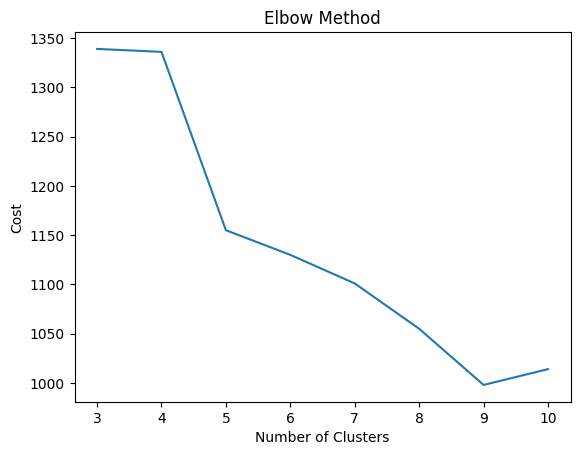

In [ ]:
# Use Elbow Method to determine the number of clusters
n_clusters = np.arange(3, 11)
costs = np.array([1339,1336,1155,1130,1101,1055,998, 1014])
plt.plot(n_clusters, costs)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method')
plt.show()

#### According to the Elbow Method, we should choose n_clusters=5

In [ ]:
from kmodes.kprototypes import KPrototypes

categorical_cols = [0, 4, 5, 6, 7]
kproto = KPrototypes(n_clusters=5, init='Cao', verbose=0)
clusters = kproto.fit_predict(df, categorical=categorical_cols)
centroids = kproto.cluster_centroids_
labels = kproto.labels_
print('#cluster=5')
print(kproto.cluster_centroids_)
print(kproto.cost_)

#cluster=5
[['0.07160772075820622' '0.07395123520070569' '0.3640603328710118' 'Yes'
  'Married' 'White' 'Undergraduate degree' 'Full-time']
 ['0.12509541984732805' '0.09592875318066085' '0.1340849738850937' 'Yes'
  'Single' 'Asian' 'Secondary / High school' 'Student']
 ['0.0825983094450566' '0.07131329594298709' '0.27054198340393476' 'Yes'
  'In a relationship' 'White' 'Diploma' 'Full-time']
 ['0.8002801120448171' '0.4287662891243462' '0.24091110128261864' 'Yes'
  'Married' 'Asian' 'Undergraduate degree' 'Full-time']
 ['0.038312829525483226' '0.0323985634599221' '0.7080057348996396' 'Yes'
  'Married' 'White' 'Undergraduate degree' 'Retired']]
1168.7356422628384


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable
  warn(
<ipython-input-70-ab982fa9a566>:48: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(*embedding[0].T, s=2, cmap='Spectral', alpha=1.0)


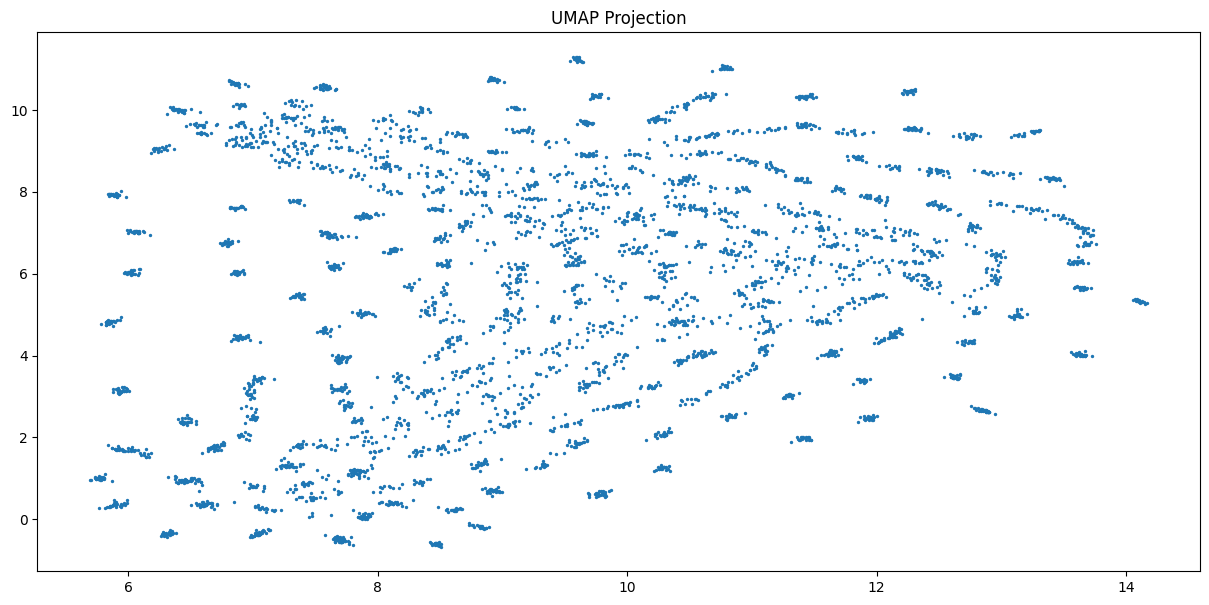

In [ ]:
# UMAP Dimension Reduction
#Preprocessing numerical
numerical = df.select_dtypes(exclude='object')

#for c in numerical.columns:
#    pt = PowerTransformer()
#    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))

##preprocessing categorical
categorical = df.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(df.select_dtypes(include='object').columns) / df.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
#embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components,
#                                                fit1._initial_alpha, fit1._a, fit1._b,
#                                                fit1.repulsion_strength, fit1.negative_sample_rate,
#                                                200, 'random', np.random, fit1.metric,
#                                                fit1._metric_kwds, False)
embedding = umap.umap_.simplicial_set_embedding(
    fit1._raw_data,
    intersection,
    fit1.n_components,
    fit1._initial_alpha,
    fit1._a,
    fit1._b,
    fit1.repulsion_strength,
    fit1.negative_sample_rate,
    200,
    'random',
    np.random,
    fit1.metric,
    fit1._metric_kwds,
    False,  # DensMAP disabled
    None,   # No densmap_kwds needed
    False   # No output density
)

plt.figure(figsize=(15, 7))
plt.scatter(*embedding[0].T, s=2, cmap='Spectral', alpha=1.0)
plt.title('UMAP Projection')
plt.show()

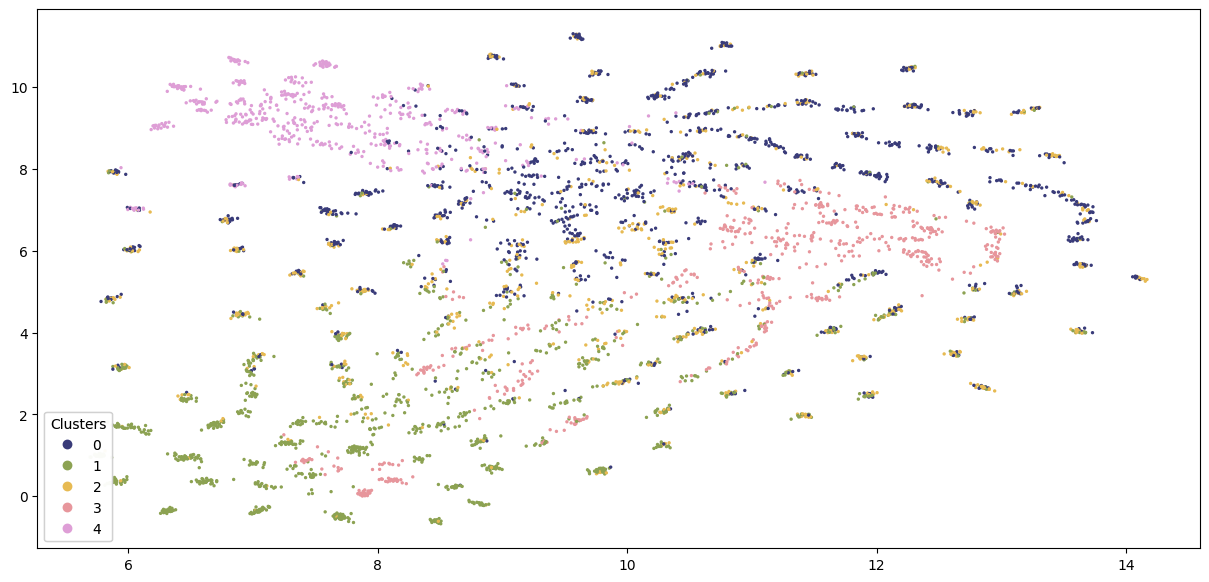

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((15, 7))
scatter = ax.scatter(embedding[0][:, 0], embedding[0][:, 1], s=2, c=labels, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

In [ ]:
# Profile Visualization / Analysis
centroids_num = centroids[:, 0:3]
centroids_num = scaler.inverse_transform(centroids_num)
centroids_cat = centroids[:, 3:]
unique, counts = np.unique(labels, return_counts=True)
centroids_show = np.concatenate((centroids_num, centroids_cat, counts.reshape((5,1))), axis=1)
centroids_df = pd.DataFrame(centroids_show, columns=['monthly_visit_frequency', 'monthly_download_frequency', 'age', 'use_app', 'Status', 'Ethnicity', 'Education', 'Job', 'num_of_points'])
centroids_df.head()

,monthly_visit_frequency,monthly_download_frequency,age,use_app,Status,Ethnicity,Education,Job,num_of_points
0,4.296463245492373,3.051317614424346,38.6685852981969,Yes,Married,White,Undergraduate degree,Full-time,1442
1,7.505725190839684,3.809541984732799,21.19045801526712,Yes,Single,Asian,Secondary / High school,Student,1310
2,4.955898566703396,2.9603087100330545,31.561190738699043,Yes,In a relationship,White,Diploma,Full-time,907
3,48.016806722689026,15.292436974789945,29.309243697479015,Yes,Married,Asian,Undergraduate degree,Full-time,595
4,2.2987697715289936,1.6177504393673126,64.80843585237261,Yes,Married,White,Undergraduate degree,Retired,569
